In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_7938/3390178302.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
# load dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc").analysed_sst


# get reference monthly avg climatology for 2002-2012
ds_ref = ds.sel(time=slice("2002-01","2012-12"))
ds_ref_mean = ds_ref.groupby(ds_ref.time.dt.month).mean()
ds_ref_mean

<xarray.DataArray 'analysed_sst' (month: 12, lat: 251, lon: 234)>
array([[[289.6206 , 289.60022, 289.5722 , ..., 288.19827, 288.20187,
         288.20685],
        [289.58914, 289.56857, 289.54202, ..., 288.17166, 288.17252,
         288.1784 ],
        [289.56946, 289.55273, 289.5334 , ..., 288.15207, 288.13855,
         288.1382 ],
        ...,
        [281.62653, 281.63974, 281.65137, ...,       nan,       nan,
               nan],
        [281.59552, 281.60242, 281.60916, ...,       nan,       nan,
               nan],
        [281.56662, 281.57037, 281.58044, ...,       nan,       nan,
               nan]],

       [[289.07672, 289.05728, 289.05   , ..., 288.0361 , 288.02783,
         288.03674],
        [289.03882, 289.03107, 289.02078, ..., 288.0247 , 288.015  ,
         288.0136 ],
        [289.01752, 289.0201 , 289.00964, ..., 288.00818, 288.0035 ,
         288.00443],
...
        [284.63443, 284.64545, 284.66028, ...,       nan,       nan,
               nan],
        [284.61047, 284.62335, 284.643  , ...,       nan,       nan,
               nan],
        [284.5923 , 284.61288, 284.63736, ...,       nan,       nan,
               nan]],

       [[290.81204, 290.7895 , 290.76678, ..., 288.9455 , 288.95178,
         288.96103],
        [290.78714, 290.7582 , 290.73294, ..., 288.94467, 288.95163,
         288.95132],
        [290.7689 , 290.73666, 290.7115 , ..., 288.913  , 288.92816,
         288.9256 ],
        ...,
        [282.76987, 282.7801 , 282.78592, ...,       nan,       nan,
               nan],
        [282.737  , 282.75504, 282.76834, ...,       nan,       nan,
               nan],
        [282.70273, 282.72354, 282.74905, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [4]:
# get reference monthly sst stdev between 2002 and 2012
ds_ref_std = ds_ref.groupby(ds_ref.time.dt.month).std()
print(ds_ref_std.min(), ds_ref_std.max())
ds_ref_std

<xarray.DataArray 'analysed_sst' ()>
array(0.3547185, dtype=float32) <xarray.DataArray 'analysed_sst' ()>
array(2.6450899, dtype=float32)


<xarray.DataArray 'analysed_sst' (month: 12, lat: 251, lon: 234)>
array([[[0.6359576 , 0.63753074, 0.62491953, ..., 0.64690244,
         0.62957674, 0.62228453],
        [0.630963  , 0.6344093 , 0.62635404, ..., 0.6513667 ,
         0.62360704, 0.620165  ],
        [0.6283698 , 0.6279541 , 0.6247475 , ..., 0.6497722 ,
         0.6309283 , 0.6366782 ],
        ...,
        [0.77239144, 0.77858067, 0.78573275, ...,        nan,
                nan,        nan],
        [0.7750358 , 0.77709216, 0.77855253, ...,        nan,
                nan,        nan],
        [0.7682589 , 0.77059525, 0.7649367 , ...,        nan,
                nan,        nan]],

       [[0.5209803 , 0.51657456, 0.49332222, ..., 0.6061962 ,
         0.6145994 , 0.6239051 ],
        [0.50988615, 0.51615876, 0.50456595, ..., 0.62191457,
         0.6224661 , 0.6213483 ],
        [0.5094507 , 0.5020465 , 0.50384545, ..., 0.63749045,
         0.63280344, 0.62771034],
...
        [1.2385768 , 1.240417  , 1.2470802 , ...,        nan,
                nan,        nan],
        [1.2464645 , 1.2501483 , 1.251707  , ...,        nan,
                nan,        nan],
        [1.2520362 , 1.2553396 , 1.262072  , ...,        nan,
                nan,        nan]],

       [[0.7094194 , 0.7194952 , 0.7187246 , ..., 0.83810633,
         0.82939714, 0.82694864],
        [0.7275419 , 0.72629476, 0.72597206, ..., 0.83638215,
         0.8307741 , 0.8189357 ],
        [0.7315373 , 0.73104084, 0.7338296 , ..., 0.83124363,
         0.8253868 , 0.82393706],
        ...,
        [1.0635682 , 1.0644182 , 1.0643524 , ...,        nan,
                nan,        nan],
        [1.0283393 , 1.0319259 , 1.0387573 , ...,        nan,
                nan,        nan],
        [1.0109048 , 1.0145105 , 1.024465  , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [6]:
# get dataset for fig1 timeframe (2014-01)
ds_fig1 = ds.sel(time=slice("2014-01")).mean("time")
# subtract 2002-2012 01 average
ds_fig1_norm = ds_fig1 - ds_ref_mean.sel(month=1)

# get length of coordinate directions
n_lat, n_lon = ds_fig1_norm.shape



In [7]:
# ds for 2014-01
print(ds_fig1_norm.min(), ds_fig1_norm.max())
ds_fig1_norm


<xarray.DataArray 'analysed_sst' ()>
array(-0.22335815, dtype=float32)
Coordinates:
    month    int64 1 <xarray.DataArray 'analysed_sst' ()>
array(3.492096, dtype=float32)
Coordinates:
    month    int64 1


<xarray.DataArray 'analysed_sst' (lat: 251, lon: 234)>
array([[1.6790466, 1.6826477, 1.6966248, ..., 2.4275513, 2.4604492,
        2.4885254],
       [1.6944275, 1.7002869, 1.7099609, ..., 2.4669495, 2.499176 ,
        2.522461 ],
       [1.7003784, 1.7013855, 1.7048645, ..., 2.5004883, 2.5447998,
        2.5733948],
       ...,
       [2.7772522, 2.77417  , 2.7710266, ...,       nan,       nan,
              nan],
       [2.7851257, 2.7905884, 2.7948608, ...,       nan,       nan,
              nan],
       [2.7887573, 2.7989807, 2.8018188, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
    month    int64 1

In [ ]:
ds_ref_std[1, :, :]

In [8]:
# compare with std, set to 0 if less than 1 std
for i in range(n_lat):
    for j in range(n_lon):
        if (abs(ds_fig1_norm[i, j]) < ds_ref_std[1, i, j]).data:
            ds_fig1_norm[i, j] = 0

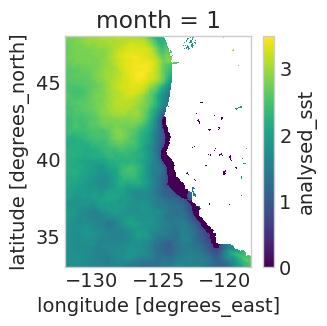

In [9]:
ds_fig1_norm.plot()